In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np 
import os,cv2


def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.98, hspace=.35)
    for i in range(n_row * n_col): 
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [11]:
dir_name= "C:\\Users\\ANJI\\OneDrive\\Desktop\\dataset\\faces\\"
y=[];X=[];target_names=[]
person_id=0;h=w=300
n_samples=0
class_names=[]
for person_name in os.listdir(dir_name):
    #print(person_name)
    dir_path =dir_name+person_name+"/"
    class_names.append(person_name) 
    for image_name in os.listdir(dir_path):
        #formulate the image path
        image_path = dir_path+image_name
        # read the input image 
        img = cv2.imread(image_path)
        # Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # resize image to 300*300 dimension
        resized_image=cv2.resize(gray,(h,w))
        #convert matrix to vector 
        v = resized_image.flatten()
        X.append(v)
        #Increase the number of samples.
        n_samples =n_samples+1 
        # Adding th categorical tabel
        y.append(person_id)
        # Adding the person name 
        target_names.append(person_name)
    # Increase the person id by 1
    person_id=person_id+1

# transform list to numpy array 
y=np.array(y) 
X=np.array(X) 
target_names =np.array(target_names) 
n_features  = X.shape[1]
print(y.shape, X.shape, target_names.shape) 
print("number of sampels:",n_samples)

n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


(450,) (450, 90000) (450,)
number of sampels: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


extracting the top 150 eigenfaces from 337 faces


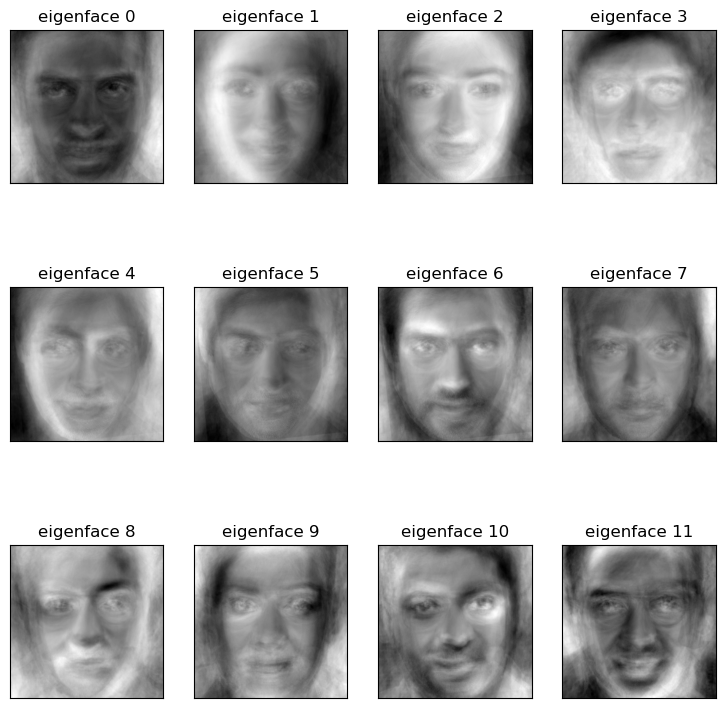

projecting the input data on the eigenfaces orthogonal basis
(337, 150) (113, 150)
project done....


In [15]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=42)
n_components = 150

print("extracting the top %d eigenfaces from %d faces"%(n_components, X_train.shape[0]))

pca = PCA(n_components = n_components, svd_solver='randomized', whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

eigenfaces_title = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

plot_gallery(eigenfaces, eigenfaces_title, h, w)
plt.show()

print("projecting the input data on the eigenfaces orthogonal basis")

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)

lda = LinearDiscriminantAnalysis()

lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("project done....")

In [20]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10),max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("model weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.76735754
Iteration 2, loss = 2.72046460
Iteration 3, loss = 2.67472339
Iteration 4, loss = 2.63016000
Iteration 5, loss = 2.58682650
Iteration 6, loss = 2.54542576
Iteration 7, loss = 2.50319878
Iteration 8, loss = 2.46277112
Iteration 9, loss = 2.42368447
Iteration 10, loss = 2.38410585
Iteration 11, loss = 2.34586478
Iteration 12, loss = 2.30962841
Iteration 13, loss = 2.27434337
Iteration 14, loss = 2.24042990
Iteration 15, loss = 2.20517616
Iteration 16, loss = 2.17229764
Iteration 17, loss = 2.14026090
Iteration 18, loss = 2.10870581
Iteration 19, loss = 2.07790873
Iteration 20, loss = 2.04762053
Iteration 21, loss = 2.01875889
Iteration 22, loss = 1.98950142
Iteration 23, loss = 1.96213853
Iteration 24, loss = 1.93432746
Iteration 25, loss = 1.90615018
Iteration 26, loss = 1.87999228
Iteration 27, loss = 1.85241067
Iteration 28, loss = 1.82709542
Iteration 29, loss = 1.80047542
Iteration 30, loss = 1.77520152
Iteration 31, loss = 1.74963480
Iteration 32, los

Iteration 301, loss = 0.07113735
Iteration 302, loss = 0.07072600
Iteration 303, loss = 0.07032249
Iteration 304, loss = 0.06992539
Iteration 305, loss = 0.06954425
Iteration 306, loss = 0.06914522
Iteration 307, loss = 0.06877573
Iteration 308, loss = 0.06839220
Iteration 309, loss = 0.06800668
Iteration 310, loss = 0.06764108
Iteration 311, loss = 0.06726391
Iteration 312, loss = 0.06690191
Iteration 313, loss = 0.06653295
Iteration 314, loss = 0.06615862
Iteration 315, loss = 0.06579446
Iteration 316, loss = 0.06545377
Iteration 317, loss = 0.06509213
Iteration 318, loss = 0.06473867
Iteration 319, loss = 0.06441699
Iteration 320, loss = 0.06406351
Iteration 321, loss = 0.06371652
Iteration 322, loss = 0.06336903
Iteration 323, loss = 0.06303671
Iteration 324, loss = 0.06269124
Iteration 325, loss = 0.06236937
Iteration 326, loss = 0.06202546
Iteration 327, loss = 0.06171213
Iteration 328, loss = 0.06137004
Iteration 329, loss = 0.06106292
Iteration 330, loss = 0.06074693
Iteration 

Accuracy: 70.79646017699115


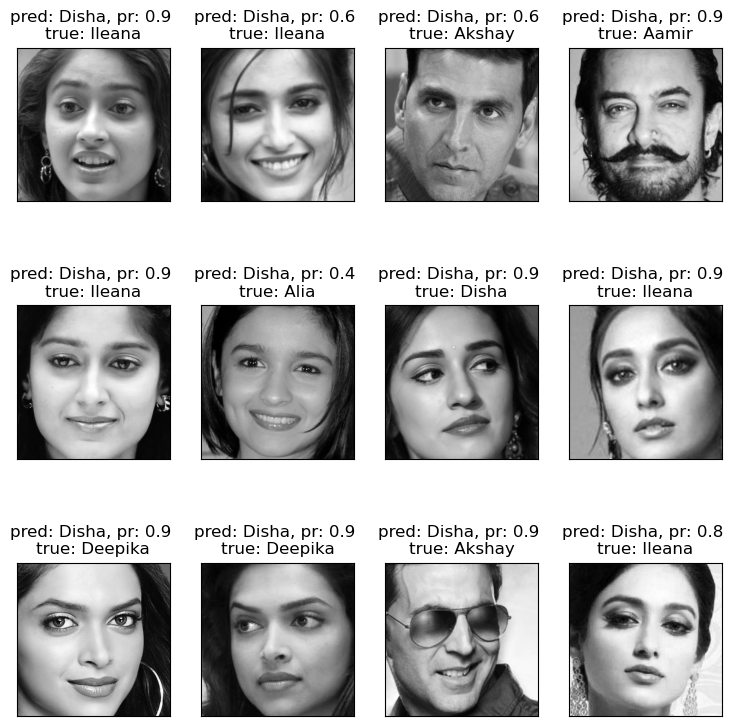

In [32]:
y_pred=[];y_prob=[]
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    #print(prob, np.max(prob))
    class_id = np.where(prob == np.max(prob))[0][0]
    #print(class_index)
    #Find the Lobel of the mathed face )
    y_pred.append(class_id)
    y_prob.append(np.max(prob))
    
#Transform the data
y_pred = np.array(y_pred)

prediction_titles=[]
true_positive=0
for i in range(y_pred.shape[0]):
    #print(y_test[(),y_pred[(])

    true_name=class_names[y_test[i]]
    pred_name=class_names[y_pred[1]]

    result='pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive= true_positive+1
        
print("Accuracy:",true_positive*1000/y_pred.shape[0])

plot_gallery(X_test, prediction_titles,h ,w)
plt.show()
        
                                                                       
   

